# Analysing housing prices in Kings County, TX

In this notebook we will analyse the housing market of one counting in Texas. Our stakeholder is interested in buying and selling older houses. We are interested in the way the houses are priced. We will be guided by two major questions:

- What does the data tell us about pricing?
- How can we profit from that?

## 1. Importing what's important

In this step we import all the libraries that we need for our project.

In [1]:


import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sms
import statsmodels.formula.api as smf
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

## 2. Style choices

In this section we set the global parameters for our plots.

In [2]:
plt.style.use('bmh')

## First impressions

We load the data and have a look, what's in it.

In [3]:
housedf = pd.read_csv('datasets/King_County_House_Prices_dataset.csv')
housedf.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [4]:
housedf.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

### 3.1. What's in it for me?

We have 20 different columns in our data set:

Variable | Description 
--- | ---
**id** | unique identified for a house
**dateDate** | house was sold
**pricePrice** |  is prediction target
**bedroomsNumber** |  # of bedrooms
**bathroomsNumber** | # of bathrooms
**sqft_livingsquare** |  footage of the home
**sqft_lotsquare** |  footage of the lot
**floorsTotal** |  floors (levels) in house
**waterfront** | House which has a view to a waterfront
**view** | Has been viewed
**condition** | How good the condition is ( Overall )
**grade** | overall grade given to the housing unit, based on King County grading system
**sqft_above** | square footage of house apart from basement
**sqft_basement** | square footage of the basement
**yr_built** | Built Year
**yr_renovated** | Year when house was renovated
**zipcode** | zip
**lat** | Latitude coordinate
**long** | Longitude coordinate
**sqft_living15** | The square footage of interior housing living space for the nearest 15 neighbors
**sqft_lot15** | The square footage of the land lots of the nearest 15 neighbors



In [5]:
housedf.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


### 3.2. Everything is bigger in Texas?

Looking at the Range of the values of the variables, we notice some odd data. A couple of maximum values seem unreasonably large. Were talking about houses costing 7.700.000 USD, having 33 bedrooms and square footages of 135400. That's a lot. But on the other hand, it Texas. So let's have a look!

<AxesSubplot:xlabel='sqft_living', ylabel='Count'>

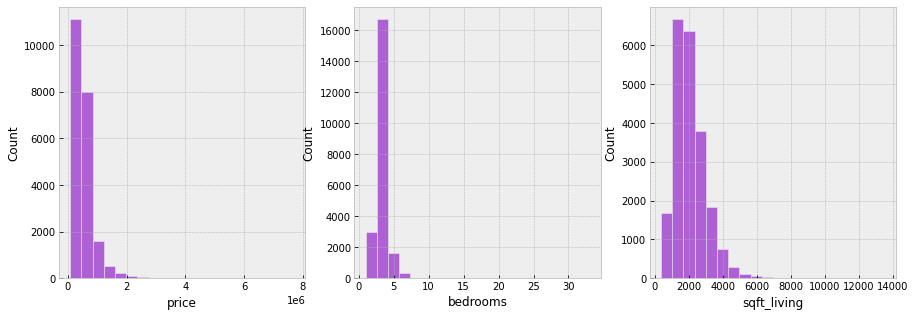

In [6]:
plt.figure(figsize = (15, 5))
plt.subplot(1, 3, 1)
sns.histplot(x = 'price', data = housedf, bins=20, color='darkorchid')
plt.subplot(1, 3, 2)
sns.histplot(x = 'bedrooms', data = housedf, bins=20, color='darkorchid')
plt.subplot(1, 3, 3)
sns.histplot(x = 'sqft_living', data = housedf, bins=20, color='darkorchid')

<AxesSubplot:xlabel='yr_renovated', ylabel='Count'>

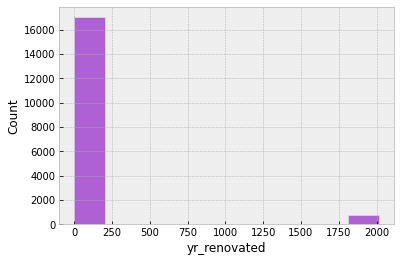

In [7]:
sns.histplot(x = 'yr_renovated', data = housedf, bins=10, color='darkorchid')

We can see that all three distributions are skewed, with some very large numbers on the right. In our further analysis, we will look at houses that cost less than 2 Million USD, with less than 8 bedrooms and less than 6000 square feet of living area

### 3.3. It's all manipulated

In the next steps we filter the data by the criteria mentioned above. Because we are in interested in older houses and we can conclude from the data containing years that the dataset is from 2015, we filter for houses that were built before 1985 and thus are older than 30 years.

We also create an new variable that shows if a house was renovated (`ren`, with 0 = unrenovated and 1 = renovated).
For better interpretability we change the `yr_built`to `age` by substracting the year the house was built from 2015
We drop all variables that don't interest us for now and last but not least drop the `NaN`.


In [8]:
ovr30 = housedf.query('yr_built<=1985 & price<2000000 & bedrooms<8 & sqft_living<6000').copy()
ovr30['ren']=1
ovr30.loc[ovr30['yr_renovated']==0, 'ren'] = 0

ovr30['age']=2015-ovr30['yr_built']
ovr30 = ovr30.drop(['waterfront','id','date','view','yr_built', 'sqft_basement'],axis=1)
ovr30 = ovr30.dropna()

## 4. Here's looking at you, categories

Within our dataset we see three major categories in which we can sort our variables.

category | variables
---|---
**size indicators** | beedrooms, bathrooms, sqft_living, sqft_lot, floors & sqft_above
**location indicators** | zipcode, lat, long, sqft_living15, sqft_lot15
**condition indicators** | grade, age, ren

We are looking at each of the categories individually.

In [9]:
size_hs = ovr30[['price', 'bedrooms', 'bathrooms', 'floors','sqft_living', 'sqft_lot', 'sqft_above']].copy()
cond_hs = ovr30[['price', 'grade', 'age', 'ren']].copy()
loc_hs = ovr30[['price', 'zipcode', 'lat','long','sqft_living15', 'sqft_lot15']].copy()



#### 4.1. Size matters?!

bedrooms: 0.3031237915520963
bathrooms: 0.5041158218594145
floors: 0.364762707079568
sqft_living: 0.6373644841514116
sqft_above: 0.5472184748902355


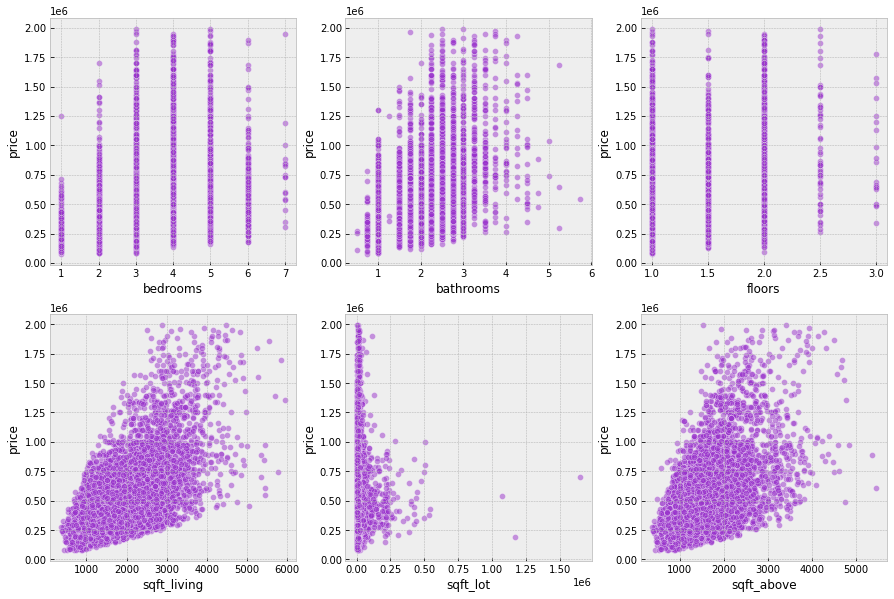

In [10]:
size_num =  ['bedrooms','bathrooms','floors', 'sqft_living', 'sqft_lot', 'sqft_above']

plt.figure(figsize = (15, 10))
x = 1
for var in size_num:
    plt.subplot(2, 3, x)
    sns.scatterplot(x = var, y = 'price', data = size_hs, color='darkorchid', alpha = 0.5)
    x+=1
    if size_hs['price'].corr(size_hs[var])>.3:
        print(var + ": " + str(size_hs['price'].corr(size_hs[var])))
    

In the plots we see that sqft_living, sqft_above and bathrooms are correlated with price. All correlations are >.5.
Bedrooms and floors seem to be categorical and have a positive relation with price. Sqft_lot doesn't correlate with price.

#### 4.1.1. Modelling time

Let's have a look at a liner regression modell with price as the target and bathrooms, sqft_living and sqft_above as linear predictors and bedrooms and floors as dummys:

In [11]:
coeffs_sz= ['bathrooms', 'sqft_living', 'sqft_above', 'C(bedrooms)', 'C(floors)']
mod_sz = smf.ols(formula='price ~ '+' + '.join(coeffs_sz), data=ovr30).fit()
mod_sz.summary()




<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.447
Model:                            OLS   Adj. R-squared:                  0.446
Method:                 Least Squares   F-statistic:                     681.7
Date:                Thu, 18 Feb 2021   Prob (F-statistic):               0.00
Time:                        11:08:48   Log-Likelihood:            -1.4988e+05
No. Observations:               10992   AIC:                         2.998e+05
Df Residuals:                   10978   BIC:                         2.999e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         6.553e+04   1.75e+04      3.755      0.000    3.13e+04    9.97e+04
C(bedrooms)[T.2] -8113.6900   1.76e+04     -0.462      0.644   -4.26e+04    2.63e+04
C(bedrooms)[T.3] -8.737e+04   1.73e+04     -5.039      0.000   -1.21e+05   -5.34e+04
C(bedrooms)[T.4] -1.166e+05   1.79e+04     -6.514      0.000   -1.52e+05   -8.15e+04
C(bedrooms)[T.5] -1.493e+05   1.94e+04     -7.714      0.000   -1.87e+05   -1.11e+05
C(bedrooms)[T.6] -2.309e+05   2.37e+04     -9.724      0.000   -2.77e+05   -1.84e+05
C(bedrooms)[T.7] -2.587e+05   5.28e+04     -4.898      0.000   -3.62e+05   -1.55e+05
C(floors)[T.1.5]  8.895e+04   5969.190     14.901      0.000    7.72e+04    1.01e+05
C(floors)[T.2.0]  8.225e+04   6988.900     11.769      0.000    6.86e+04     9.6e+04
C(floors)[T.2.5]  2.401e+05   2.76e+04      8.714      0.000    1.86e+05    2.94e+05
C(floors)[T.3.0]  2.101e+05   4.69e+04      4.475      0.000    1.18e+05    3.02e+05
bathrooms         3.425e+04   4471.213      7.660      0.000    2.55e+04     4.3e+04
sqft_living        224.7689      5.544     40.544      0.000     213.902     235.636
sqft_above           8.1389      6.472      1.257      0.209      -4.548      20.826
==============================================================================
Omnibus:                     2332.319   Durbin-Watson:                   1.969
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7390.707
Skew:                           1.080   Prob(JB):                         0.00
Kurtosis:                       6.387   Cond. No.                     7.39e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.39e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Adjusted R-Squared is at .446. All predictors are significant except for sqft_above. This is probably because it is highly correlated with sqft_living. Let's kick out sqft_living and see what happens:

In [12]:
coeffs_sz= ['bathrooms', 'sqft_living', 'C(bedrooms)', 'C(floors)']
mod_sz = smf.ols(formula='price ~ '+' + '.join(coeffs_sz), data=ovr30).fit()
mod_sz.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.447
Model:                            OLS   Adj. R-squared:                  0.446
Method:                 Least Squares   F-statistic:                     738.3
Date:                Thu, 18 Feb 2021   Prob (F-statistic):               0.00
Time:                        11:08:48   Log-Likelihood:            -1.4988e+05
No. Observations:               10992   AIC:                         2.998e+05
Df Residuals:                   10979   BIC:                         2.999e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         6.821e+04   1.73e+04      3.938      0.000    3.43e+04    1.02e+05
C(bedrooms)[T.2] -7534.0143   1.76e+04     -0.429      0.668    -4.2e+04    2.69e+04
C(bedrooms)[T.3] -8.615e+04   1.73e+04     -4.976      0.000    -1.2e+05   -5.22e+04
C(bedrooms)[T.4] -1.157e+05   1.79e+04     -6.469      0.000   -1.51e+05   -8.06e+04
C(bedrooms)[T.5] -1.488e+05   1.93e+04     -7.692      0.000   -1.87e+05   -1.11e+05
C(bedrooms)[T.6]   -2.3e+05   2.37e+04     -9.692      0.000   -2.77e+05   -1.83e+05
C(bedrooms)[T.7] -2.548e+05   5.27e+04     -4.832      0.000   -3.58e+05   -1.51e+05
C(floors)[T.1.5]  9.074e+04   5796.261     15.655      0.000    7.94e+04    1.02e+05
C(floors)[T.2.0]  8.663e+04   6061.416     14.291      0.000    7.47e+04    9.85e+04
C(floors)[T.2.5]  2.459e+05   2.72e+04      9.044      0.000    1.93e+05    2.99e+05
C(floors)[T.3.0]  2.166e+05   4.67e+04      4.643      0.000    1.25e+05    3.08e+05
bathrooms         3.397e+04   4465.796      7.607      0.000    2.52e+04    4.27e+04
sqft_living        229.1121      4.336     52.833      0.000     220.612     237.612
==============================================================================
Omnibus:                     2353.471   Durbin-Watson:                   1.969
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7495.801
Skew:                           1.088   Prob(JB):                         0.00
Kurtosis:                       6.411   Cond. No.                     5.80e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.8e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The model fit stays the same and all predictors are significant. We prefer this model, because it is more sparse.

### 4.2. This is where it is?

Now let's look at the location:

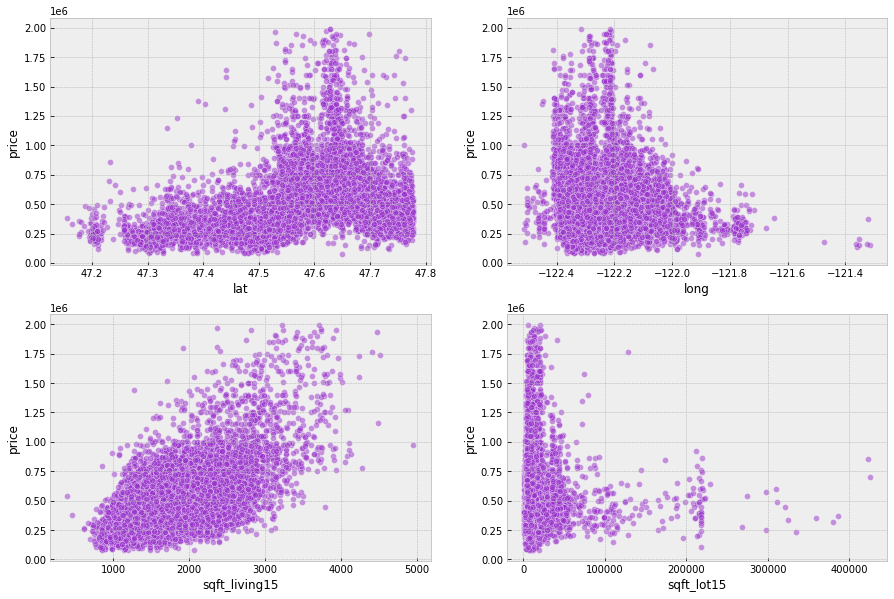

In [13]:
loc_num = ['lat','long','sqft_living15', 'sqft_lot15']

plt.figure(figsize = (15, 10))
x = 1
for var in loc_num:
    plt.subplot(2, 2, x)
    sns.scatterplot(x = var, y = 'price', data = loc_hs, color='darkorchid', alpha = 0.5)
    x+=1

There seems to be a pattern within longitude, lattitude and price. But it's not linear, we can't use it categorically and we don't have time to go into it. But maybe there's a category for location? (*cough* `zipcode`*cough*)

Sqft_lot15 doesn't seem correlated with price. But sqft_living15 has a strong correlation with price. Maybe it's because houses in a neighbourhood are similiar and when my neighbours houses are big, mine is too. If we plot both next to each other, it seems that way. But is it really?

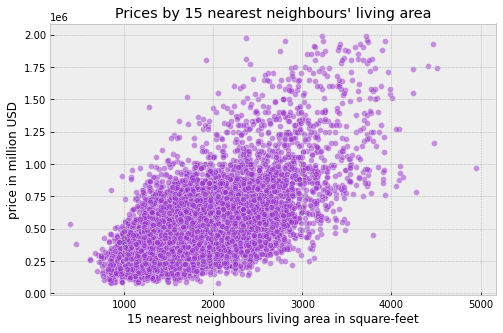

In [14]:
plt.figure(figsize = (8,5))

sns.scatterplot(x = 'sqft_living15', y = 'price', data = loc_hs, color='darkorchid', alpha = 0.5)
plt.title("Prices by 15 nearest neighbours' living area")
plt.ylabel('price in million USD')
plt.xlabel('15 nearest neighbours living area in square-feet')
plt.savefig('plots/living_area.jpg', dpi=100, bbox_inches='tight')

In [15]:
smf.ols(formula='price~sqft_living+sqft_living15', data=ovr30).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.479
Model:                            OLS   Adj. R-squared:                  0.479
Method:                 Least Squares   F-statistic:                     5061.
Date:                Thu, 18 Feb 2021   Prob (F-statistic):               0.00
Time:                        11:08:49   Log-Likelihood:            -1.4954e+05
No. Observations:               10992   AIC:                         2.991e+05
Df Residuals:                   10989   BIC:                         2.991e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -1.023e+05   6441.669    -15.888      0.000   -1.15e+05   -8.97e+04
sqft_living     143.1574      3.468     41.281      0.000     136.360     149.955
sqft_living15   181.0933      4.606     39.315      0.000     172.064     190.122
==============================================================================
Omnibus:                     1838.746   Durbin-Watson:                   1.966
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4409.622
Skew:                           0.948   Prob(JB):                         0.00
Kurtosis:                       5.457   Cond. No.                     9.34e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.34e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Regression shows, that even after controlling for the size of the house, the size of the neighbours' houses seems to influence the price.

So let's see, if the zipcode and the size of the neighbours' houses are good in explaining prices:

In [16]:
coeffs_loc = ['C(zipcode)','sqft_living15']
mod_loc = smf.ols(formula='price ~ '+' + '.join(coeffs_loc), data=ovr30).fit()
mod_loc.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.696
Model:                            OLS   Adj. R-squared:                  0.694
Method:                 Least Squares   F-statistic:                     357.1
Date:                Thu, 18 Feb 2021   Prob (F-statistic):               0.00
Time:                        11:08:50   Log-Likelihood:            -1.4659e+05
No. Observations:               10992   AIC:                         2.933e+05
Df Residuals:                   10921   BIC:                         2.938e+05
Df Model:                          70                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept           -1.535e+05   1.31e+04    -11.750      0.000   -1.79e+05   -1.28e+05
C(zipcode)[T.98002]  4.328e+04   1.84e+04      2.355      0.019    7256.338    7.93e+04
C(zipcode)[T.98003] -1.343e+04   1.71e+04     -0.784      0.433    -4.7e+04    2.02e+04
C(zipcode)[T.98004]  5.898e+05   1.68e+04     35.125      0.000    5.57e+05    6.23e+05
C(zipcode)[T.98005]  3.146e+05   1.82e+04     17.280      0.000    2.79e+05     3.5e+05
C(zipcode)[T.98006]   2.66e+05   1.55e+04     17.199      0.000    2.36e+05    2.96e+05
C(zipcode)[T.98007]  2.259e+05   1.99e+04     11.364      0.000    1.87e+05    2.65e+05
C(zipcode)[T.98008]  2.459e+05   1.58e+04     15.613      0.000    2.15e+05    2.77e+05
C(zipcode)[T.98010]  1.098e+05   2.66e+04      4.121      0.000    5.76e+04    1.62e+05
C(zipcode)[T.98011]   8.71e+04   2.03e+04      4.286      0.000    4.73e+04    1.27e+05
C(zipcode)[T.98014]  1.091e+05   2.54e+04      4.289      0.000    5.92e+04    1.59e+05
C(zipcode)[T.98019]  7.277e+04   2.88e+04      2.526      0.012    1.63e+04    1.29e+05
C(zipcode)[T.98022]  4.234e+04   1.88e+04      2.248      0.025    5419.387    7.93e+04
C(zipcode)[T.98023] -2.447e+04   1.51e+04     -1.626      0.104    -5.4e+04    5030.507
C(zipcode)[T.98024]  1.328e+05   2.85e+04      4.665      0.000     7.7e+04    1.89e+05
C(zipcode)[T.98027]  1.318e+05   1.73e+04      7.607      0.000    9.78e+04    1.66e+05
C(zipcode)[T.98028]    9.3e+04   1.77e+04      5.251      0.000    5.83e+04    1.28e+05
C(zipcode)[T.98029]  1.774e+05   4.07e+04      4.363      0.000    9.77e+04    2.57e+05
C(zipcode)[T.98030] -6158.1226   2.04e+04     -0.301      0.763   -4.62e+04    3.39e+04
C(zipcode)[T.98031]  5330.3370   1.83e+04      0.292      0.771   -3.05e+04    4.12e+04
C(zipcode)[T.98032]  2427.6395   1.92e+04      0.127      0.899   -3.51e+04       4e+04
C(zipcode)[T.98033]  2.731e+05    1.6e+04     17.064      0.000    2.42e+05    3.04e+05
C(zipcode)[T.98034]  1.602e+05   1.46e+04     11.007      0.000    1.32e+05    1.89e+05
C(zipcode)[T.98038]  3.998e+04   2.11e+04      1.899      0.058   -1290.176    8.13e+04
C(zipcode)[T.98039]  8.222e+05   3.77e+04     21.832      0.000    7.48e+05    8.96e+05
C(zipcode)[T.98040]  4.547e+05   1.68e+04     27.053      0.000    4.22e+05    4.88e+05
C(zipcode)[T.98042]  2.045e+04   1.58e+04      1.291      0.197   -1.06e+04    5.15e+04
C(zipcode)[T.98045]  1.212e+05   2.03e+04      5.976      0.000    8.15e+04    1.61e+05
C(zipcode)[T.98052]  2.131e+05   1.53e+04     13.972      0.000    1.83e+05    2.43e+05
C(zipcode)[T.98053]  1.268e+05   2.43e+04      5.213      0.000    7.91e+04    1.74e+05
C(zipcode)[T.98055]  2.022e+04   1.73e+04      1.171      0.242   -1.36e+04    5.41e+04
C(zipcode)[T.98056]  9.517e+04   1.62e+04      5.886      0.000    6.35e+04    1.27e+05
C(z

So many cooefficents. But most zip codes are signficant and adjusted R-Squared is .664. Pretty impressive

### 4.3. It's the (non-)human condition

So now let's see how the condition might influence the price:

0.114360012472634
0.65464945785751


<AxesSubplot:xlabel='grade', ylabel='price'>

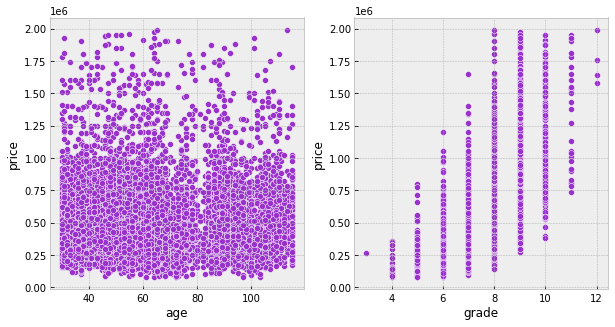

In [17]:
print(cond_hs['price'].corr(cond_hs['age']))
print(cond_hs['price'].corr(cond_hs['grade']))
plt.figure(figsize = (10, 5))
plt.subplot(1, 2, 1)
sns.scatterplot(x = 'age', y = 'price', data = cond_hs, color = 'darkorchid')
plt.subplot(1, 2, 2)
sns.scatterplot(x = 'grade', y = 'price', data = cond_hs, color = 'darkorchid')

Grade seems to correlate with price. Age for some reason doesn't. But what about renovated and unrenovated houses?

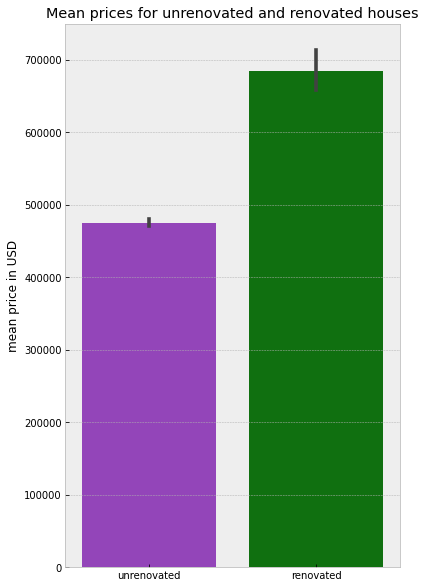

In [18]:
plt.figure(figsize=(6,10))
sns.barplot(x='ren', y = 'price', data=cond_hs, palette=['darkorchid', 'green'])
plt.ylabel('mean price in USD')
plt.title('Mean prices for unrenovated and renovated houses')
plt.xlabel('')
plt.xticks(ticks=[0,1], labels=['unrenovated', 'renovated'])
plt.savefig('plots/mean_ren.jpg', dpi=100, bbox_inches='tight')

In [19]:
unreno = ovr30[ovr30['ren']==0]
reno = ovr30[ovr30['ren']==1]
mean_unr = unreno['price'].mean()
mean_ren = reno['price'].mean()
tt=stats.ttest_ind(unreno['price'], reno['price'])
mean_diff = mean_ren-mean_unr
print(f'mean price of unrenovated houses is: {int(mean_unr)} USD, \nmean price of renovated houses is: {int(mean_ren)} USD\nthe difference of {int(mean_diff)} USD is statisticially significant (t({len(ovr30.price)-1}) = {tt[0]}, p = {tt[1]})')

mean price of unrenovated houses is: 475008 USD, 
mean price of renovated houses is: 684620 USD
the difference of 209611 USD is statisticially significant (t(10991) = -20.182940678054244, p = 5.604424278498092e-89)


In [20]:
coeffs_cond = ['ren', 'grade', 'age']
mod_cond = smf.ols(formula='price ~ '+' + '.join(coeffs_cond), data=ovr30).fit()
mod_cond.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.521
Model:                            OLS   Adj. R-squared:                  0.521
Method:                 Least Squares   F-statistic:                     3982.
Date:                Thu, 18 Feb 2021   Prob (F-statistic):               0.00
Time:                        11:08:51   Log-Likelihood:            -1.4909e+05
No. Observations:               10992   AIC:                         2.982e+05
Df Residuals:                   10988   BIC:                         2.982e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -1.27e+06   1.69e+04    -75.049      0.000    -1.3e+06   -1.24e+06
ren         5.904e+04   7545.142      7.825      0.000    4.43e+04    7.38e+04
grade       2.113e+05   2017.809    104.740      0.000    2.07e+05    2.15e+05
age         3675.6090     86.242     42.620      0.000    3506.560    3844.658
==============================================================================
Omnibus:                     2803.791   Durbin-Watson:                   1.967
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            10393.108
Skew:                           1.241   Prob(JB):                         0.00
Kurtosis:                       7.066   Cond. No.                         627.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Interesting, huh? Renovated houses sell for a whooping 211680 USD more than unrenovated houses. That's a lot. Remember our questions from above? Renovation is something we can do to houses. So maybe there's a path to profit from our data. 

### 5. Do I renovate?

Let's have a deeper look, if we can profit from renovated houses and if that profit may vary between the houses. For now we know which variables are good in explaining housing prices. Maybe some of them interact with renovation. Let's see.


In [21]:
coeffs_all = coeffs_sz + coeffs_loc + coeffs_cond
coeffs_all
for coeff in coeffs_all:
    if coeff!='C(zipcode)' and coeff!='ren':
        interact_model = smf.ols(formula='price ~ ren*'+coeff, data=ovr30).fit()
        print(f'\n Model for interaction with {coeff}: \n\nAdjusted R-squared = {interact_model.rsquared_adj} \n\np-values:\n {interact_model.pvalues}')
#intercept, slope1, slope2,slope3  = interact_model1.params


 Model for interaction with bathrooms: 

Adjusted R-squared = 0.26828280363243073 

p-values:
 Intercept        3.152745e-100
ren               4.755882e-02
bathrooms         0.000000e+00
ren:bathrooms     3.168418e-12
dtype: float64

 Model for interaction with sqft_living: 

Adjusted R-squared = 0.4212369390094166 

p-values:
 Intercept          1.515151e-38
ren                1.315048e-03
sqft_living        0.000000e+00
ren:sqft_living    7.710129e-20
dtype: float64

 Model for interaction with C(bedrooms): 

Adjusted R-squared = 0.1311024870127273 

p-values:
 Intercept               5.339663e-45
C(bedrooms)[T.2]        2.273596e-03
C(bedrooms)[T.3]        2.597676e-08
C(bedrooms)[T.4]        6.762913e-27
C(bedrooms)[T.5]        1.443345e-39
C(bedrooms)[T.6]        2.909920e-26
C(bedrooms)[T.7]        7.365298e-07
ren                     4.113930e-01
ren:C(bedrooms)[T.2]    6.956638e-01
ren:C(bedrooms)[T.3]    1.258307e-01
ren:C(bedrooms)[T.4]    2.136722e-02
ren:C(bedrooms)[T.5] 

The following feature seem to interact with renovation:

* bathrooms
* sqft_living
* sqft_living15
* age
* grade

In the next step we will plot, what an interaction looks like:

In [22]:
interact_model1 = smf.ols(formula = 'price ~ sqft_living*ren', data = ovr30).fit()
intercept, slope1, slope2, slope3 = interact_model1.params

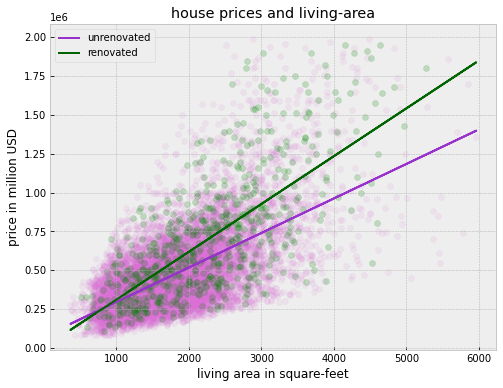

In [23]:
fig, ax = plt.subplots(figsize=(8, 6))
x = ovr30.sqft_living
# add data points)
ax.scatter(ovr30.query('ren==0').sqft_living, ovr30.query('ren==0').price, alpha=0.1, color='orchid')
# plotting regression line
ax.plot(x, x*slope1 +intercept, '-', color='darkorchid', linewidth=2);
ax.scatter(ovr30.query('ren==1').sqft_living, ovr30.query('ren==1').price, alpha=0.2, color='green')
# plotting regression line
ax.plot(x, x*slope1+slope2+x*slope3 +intercept, '-', color='darkgreen', linewidth=2);
ax.set_ylabel("price in million USD");
ax.set_xlabel('living area in square-feet');
ax.legend(['unrenovated', 'renovated'])
ax.set_title('house prices and living-area')
fig.savefig('plots/interaction.jpg', dpi=100, bbox_inches='tight')

Conclusion: The bigger the house, the bigger the margin between renovated and unrenovated houses.

### 6. I see a bright future

We have learned a lot about possible features for our prediction model. Let's see, how they perform

In [24]:

coeffs_int = ['bathrooms*ren', 'sqft_living*ren', 'bedrooms', 'C(floors)','C(zipcode)', 'sqft_living15*ren', 'age*ren', 'grade*ren']
mod_all = smf.ols(formula='price ~ '+' + '.join(coeffs_all), data=ovr30).fit()
mod_int = smf.ols(formula='price ~ '+' + '.join(coeffs_int), data=ovr30).fit()

In [25]:
print(f'''Adjusted R-squared for size-coefficents:\t\t\t {round(mod_sz.rsquared_adj,4)}  
Adjusted R-squared for location-coefficents:\t\t\t {round(mod_loc.rsquared_adj,4)}
Adjusted R-squared for condition-coefficents:\t\t\t {round(mod_cond.rsquared_adj,4)}
Adjusted R-squared for all coefficents:\t\t\t\t {round(mod_all.rsquared_adj,4)}  
Adjusted R-squared for all coefficents (with interaction):\t {round(mod_int.rsquared_adj,4)}  ''')

Adjusted R-squared for size-coefficents:			 0.446  
Adjusted R-squared for location-coefficents:			 0.694
Adjusted R-squared for condition-coefficents:			 0.5208
Adjusted R-squared for all coefficents:				 0.7937  
Adjusted R-squared for all coefficents (with interaction):	 0.7997  


Our interaction model seems to be quite good in explaining the price. Let's see if we can predict.

Because we want to predict renovated and unrenovated houses and the number of renovated houses is quite low, we want to make sure that we have enough renovated houses in both our training and test data.
We first split the dataset in two by the renovation status. In the next step we split both datasets in test and train sets and then concencate them. That way the proportions between renovated and unrenovated datasets remain the same.

After that we train the model and predict the test data and eveluate it with the RMSE.

In [26]:
train_un, test_un = train_test_split(ovr30.query('ren==0'), test_size=0.3, random_state=42)
train_ren, test_ren = train_test_split(ovr30.query('ren==1'), test_size=0.3, random_state=42)

train = pd.concat([train_un, train_ren])
test = pd.concat([test_un, test_ren])

In [27]:
mod = smf.ols(formula='price ~ '+' + '.join(coeffs_int), data=train).fit()

In [28]:
pred = mod.predict(test)
pred_un = mod.predict(test_un)
pred_ren = mod.predict(test_ren)

In [29]:
mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.807
Model:                            OLS   Adj. R-squared:                  0.804
Method:                 Least Squares   F-statistic:                     373.4
Date:                Thu, 18 Feb 2021   Prob (F-statistic):               0.00
Time:                        11:08:53   Log-Likelihood:            -1.0085e+05
No. Observations:                7693   AIC:                         2.019e+05
Df Residuals:                    7607   BIC:                         2.025e+05
Df Model:                          85                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept           -5.142e+05    2.1e+04    -24.536      0.000   -5.55e+05   -4.73e+05
C(floors)[T.1.5]     6671.0118   4615.665      1.445      0.148   -2376.966    1.57e+04
C(floors)[T.2.0]     1.477e+04   4538.727      3.253      0.001    5868.875    2.37e+04
C(floors)[T.2.5]     8.636e+04   2.01e+04      4.299      0.000     4.7e+04    1.26e+05
C(floors)[T.3.0]     9.438e+04   3.26e+04      2.897      0.004    3.05e+04    1.58e+05
C(zipcode)[T.98002]  2.048e+04   1.75e+04      1.169      0.243   -1.39e+04    5.48e+04
C(zipcode)[T.98003] -1.872e+04   1.62e+04     -1.154      0.249   -5.05e+04    1.31e+04
C(zipcode)[T.98004]  5.629e+05    1.6e+04     35.249      0.000    5.32e+05    5.94e+05
C(zipcode)[T.98005]  2.682e+05   1.73e+04     15.483      0.000    2.34e+05    3.02e+05
C(zipcode)[T.98006]  2.419e+05   1.46e+04     16.565      0.000    2.13e+05    2.71e+05
C(zipcode)[T.98007]  2.086e+05   1.94e+04     10.766      0.000    1.71e+05    2.47e+05
C(zipcode)[T.98008]  2.201e+05   1.47e+04     14.950      0.000    1.91e+05    2.49e+05
C(zipcode)[T.98010]   1.19e+05   2.51e+04      4.740      0.000    6.98e+04    1.68e+05
C(zipcode)[T.98011]  8.808e+04   1.96e+04      4.499      0.000    4.97e+04    1.26e+05
C(zipcode)[T.98014]  1.294e+05   2.44e+04      5.301      0.000    8.15e+04    1.77e+05
C(zipcode)[T.98019]  1.138e+05   2.62e+04      4.346      0.000    6.25e+04    1.65e+05
C(zipcode)[T.98022]  2.876e+04   1.75e+04      1.647      0.100   -5481.138     6.3e+04
C(zipcode)[T.98023]  -2.45e+04   1.43e+04     -1.714      0.087   -5.25e+04    3523.729
C(zipcode)[T.98024]  1.288e+05   2.75e+04      4.682      0.000    7.49e+04    1.83e+05
C(zipcode)[T.98027]  1.245e+05   1.64e+04      7.573      0.000    9.23e+04    1.57e+05
C(zipcode)[T.98028]  8.806e+04   1.68e+04      5.232      0.000    5.51e+04    1.21e+05
C(zipcode)[T.98029]  1.951e+05   4.18e+04      4.669      0.000    1.13e+05    2.77e+05
C(zipcode)[T.98030] -7043.1747   1.88e+04     -0.375      0.708   -4.39e+04    2.98e+04
C(zipcode)[T.98031]  1.305e+04   1.74e+04      0.751      0.453    -2.1e+04    4.71e+04
C(zipcode)[T.98032] -1.467e+04   1.81e+04     -0.809      0.418   -5.02e+04    2.09e+04
C(zipcode)[T.98033]    2.8e+05   1.51e+04     18.498      0.000     2.5e+05     3.1e+05
C(zipcode)[T.98034]  1.609e+05   1.38e+04     11.675      0.000    1.34e+05    1.88e+05
C(zipcode)[T.98038]   3.32e+04      2e+04      1.659      0.097   -6031.982    7.24e+04
C(zipcode)[T.98039]  7.321e+05   3.45e+04     21.245      0.000    6.65e+05       8e+05
C(zipcode)[T.98040]  4.167e+05   1.61e+04     25.850      0.000    3.85e+05    4.48e+05
C(zipcode)[T.98042]  2.307e+04    1.5e+04      1.535      0.125   -6385.644    5.25e+04
C(zipcode)[T.98045]  1.161e+05   1.95e+04      5.945      0.000    7.78e+04    1.54e+05
C(z

In [30]:
rmse_all = mean_squared_error(test.price, pred, squared=False)
rmse_un = mean_squared_error(test_un.price, pred_un, squared=False)
rmse_ren = mean_squared_error(test_ren.price, pred_ren, squared=False)
print(f'RMSE for complete testdata:\t{round(rmse_all,2)}\n\nRMSE for unrenovated houses:\t{round(rmse_un,2)}\n\nRMSE for renovated houses:\t{round(rmse_ren,2)}')

RMSE for complete testdata:	125524.94

RMSE for unrenovated houses:	120883.83

RMSE for renovated houses:	180024.99


Not good, but probably not terrible for a first try. But we especially have to work on the renovated houses. Maybe we can gather more data.

### 7. Let's play it save

We save our trained model and our data sets to use them in other applications

In [31]:
mod.save("model/regression_with_interaction.pickle")
test.to_csv('datasets/test_data.csv')
test_un.to_csv('datasets/unrenovated_data.csv')
test_ren.to_csv('datasets/renovated_data.csv')
ovr30.to_csv('datasets/train_model.csv')
train.to_csv('datasets/training-set.csv')